In [110]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.preprocessing import (LabelEncoder, OneHotEncoder, StandardScaler)


### Reading csv file

In [111]:
columns_name =[
    'timestamp','sex','matric_gpa_%' ,'year_in_2023','faculty','gpa_%_2023','accommodation_status',
    'monthly_allowance','scholarship_bursary_2023','study_hours_week','socialising_week','drinks_night',
    'classes_missed_alcohol','modules_failed','in_relationship','parental_approval_alcohol','relationship_with_parents'
]
data = pd.read_csv('Stats survey.csv', 
                  names=columns_name,
                  header=0)

In [112]:
data .head()

,timestamp,sex,matric_gpa_%,year_in_2023,faculty,gpa_%_2023,accommodation_status,monthly_allowance,scholarship_bursary_2023,study_hours_week,socialising_week,drinks_night,classes_missed_alcohol,modules_failed,in_relationship,parental_approval_alcohol,relationship_with_parents
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


<br>

### Data Exploration

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  406 non-null    object 
 1   sex                        404 non-null    object 
 2   matric_gpa_%               399 non-null    float64
 3   year_in_2023               333 non-null    object 
 4   faculty                    399 non-null    object 
 5   gpa_%_2023                 320 non-null    float64
 6   accommodation_status       383 non-null    object 
 7   monthly_allowance          375 non-null    object 
 8   scholarship_bursary_2023   398 non-null    object 
 9   study_hours_week           403 non-null    object 
 10  socialising_week           404 non-null    object 
 11  drinks_night               404 non-null    object 
 12  classes_missed_alcohol     403 non-null    object 
 13  modules_failed             403 non-null    object 

In [114]:
data.shape

(406, 17)

**Let's see how our data are distributed**

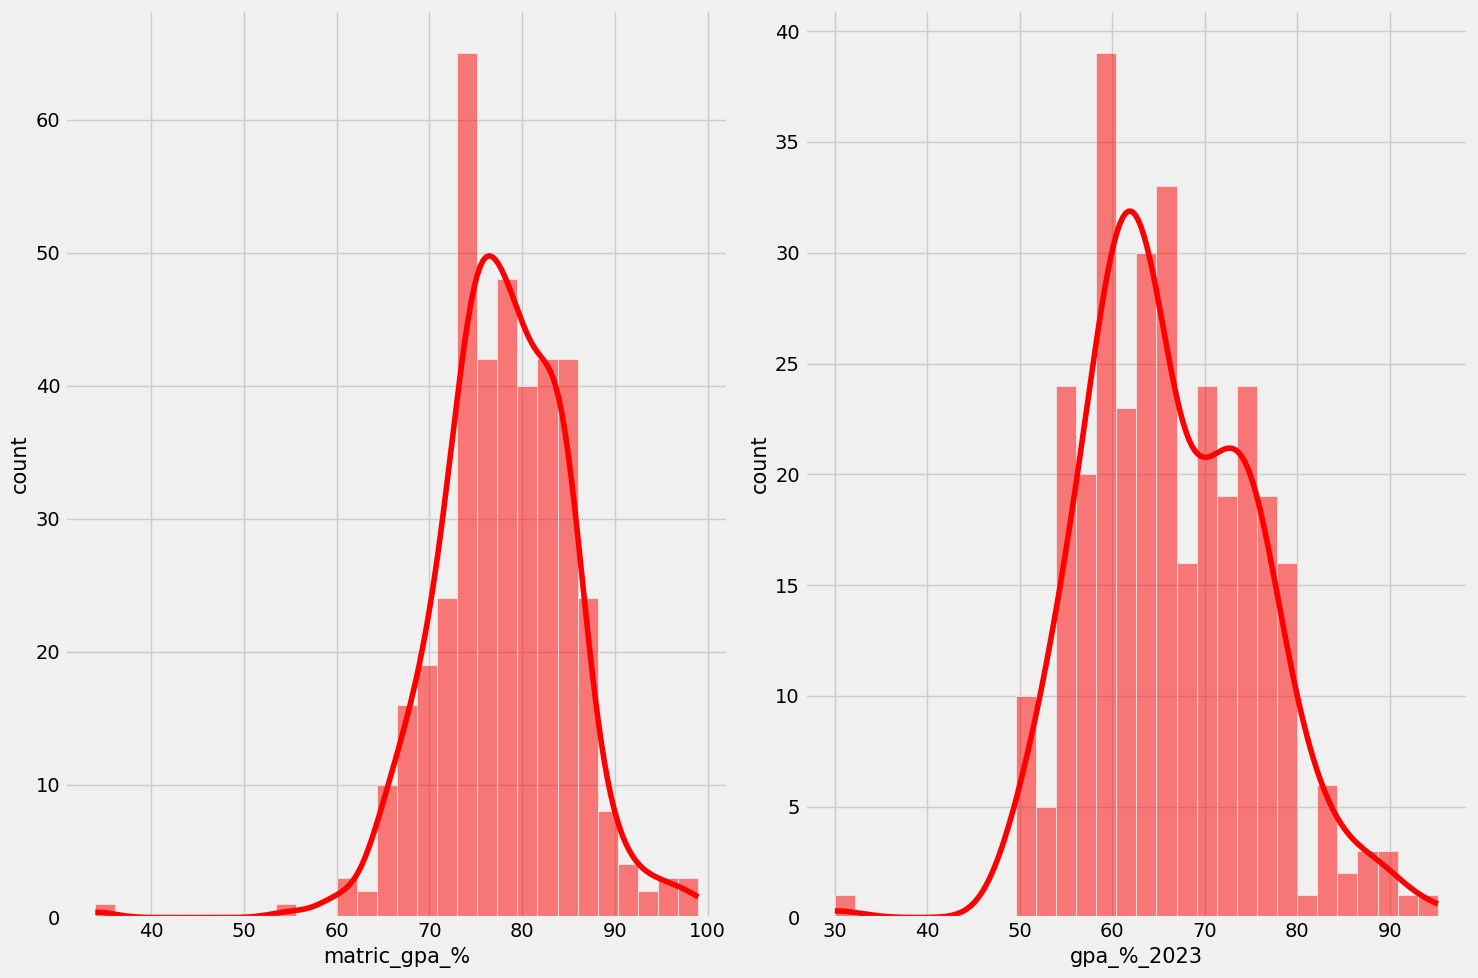

In [115]:
plt.style.use('fivethirtyeight')
fig=plt.figure()

cols = ['matric_gpa_%', 'gpa_%_2023']

for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(15,10)
    
    sns.histplot(data=data[col], bins=30, color='red', kde=True)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('count', fontsize=15)
    plt.tight_layout()


**We can see outliers here by this plot**

In [116]:
data.describe()

,matric_gpa_%,gpa_%_2023
count,399.000000,320.000000
mean,77.989724,66.268469
std,7.048618,9.147906
min,34.000000,30.000000
25%,74.000000,60.000000
50%,78.000000,65.000000
75%,83.000000,73.000000
max,99.000000,95.220000


#### How relationship with parents effects in drinking alcohol.

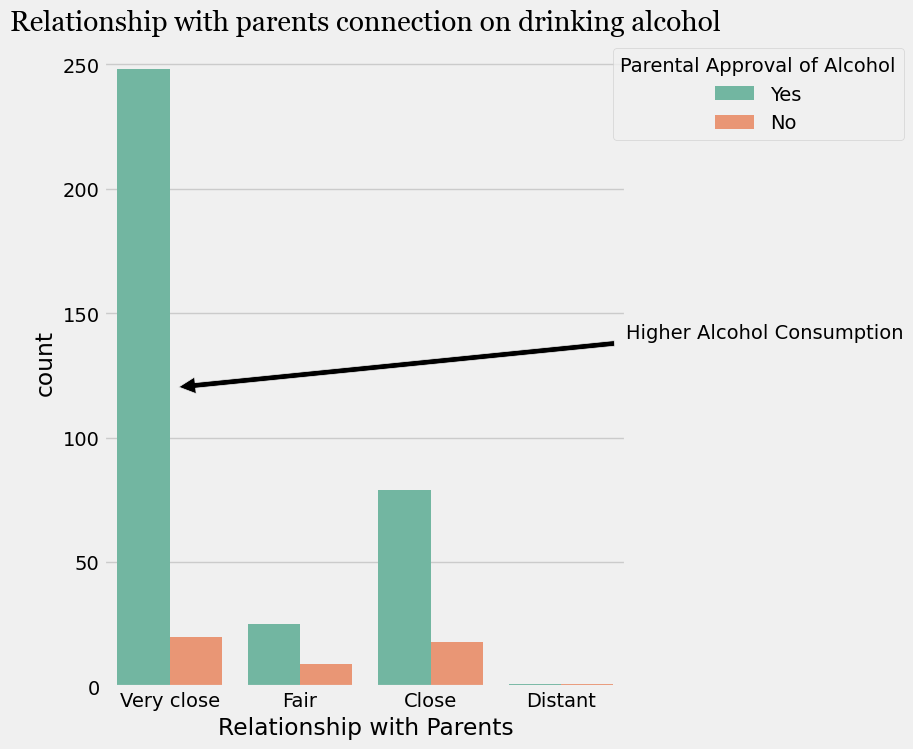

In [117]:
plt.figure(figsize=(6, 8), dpi=100)
sns.countplot(x='relationship_with_parents',  data=data, hue='parental_approval_alcohol', palette='Set2')
plt.title('Relationship with parents connection on drinking alcohol', color='black', fontname='Georgia')
plt.xlabel('Relationship with Parents')
plt.legend(title='Parental Approval of Alcohol', loc='upper right', bbox_to_anchor=(1.55,1))
plt.annotate('Higher Alcohol Consumption', xy=(0, 120), xytext=(3.5, 140),
             arrowprops=dict(facecolor='black', shrink=0.02))
plt.show()

This figure indicates that students who have a very close relationship with their parents tend to have a higher tendency to consume alcohol.

<br>

#### In the following diagram we are going to see students who love socializing/going out at night tends to drink more alcohol or students who do not go drinks more alchohol.

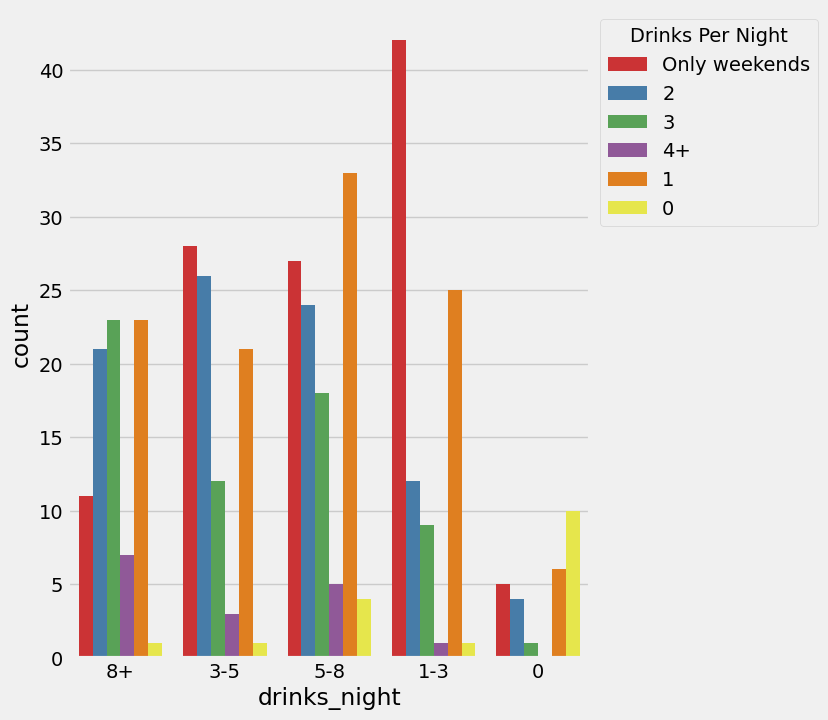

In [118]:
plt.figure(figsize=(6, 8))
sns.countplot(x='drinks_night',  data=data, hue='socialising_week', palette='Set1')
plt.legend(title='Drinks Per Night', loc='upper left',  bbox_to_anchor=(1, 1))
plt.show()

From this we can see lots of students go out for socializing only few are there we do not go out. Similarly, students who go out for socializing tends to drink more alcohols. Students who out only on weekends used to drink 1-3 shot highly and who dont drink are very few. Likewise, many students go partying mainly on weekends.

<br>

#### Lets see socializing days per week hamper in study hour or not?

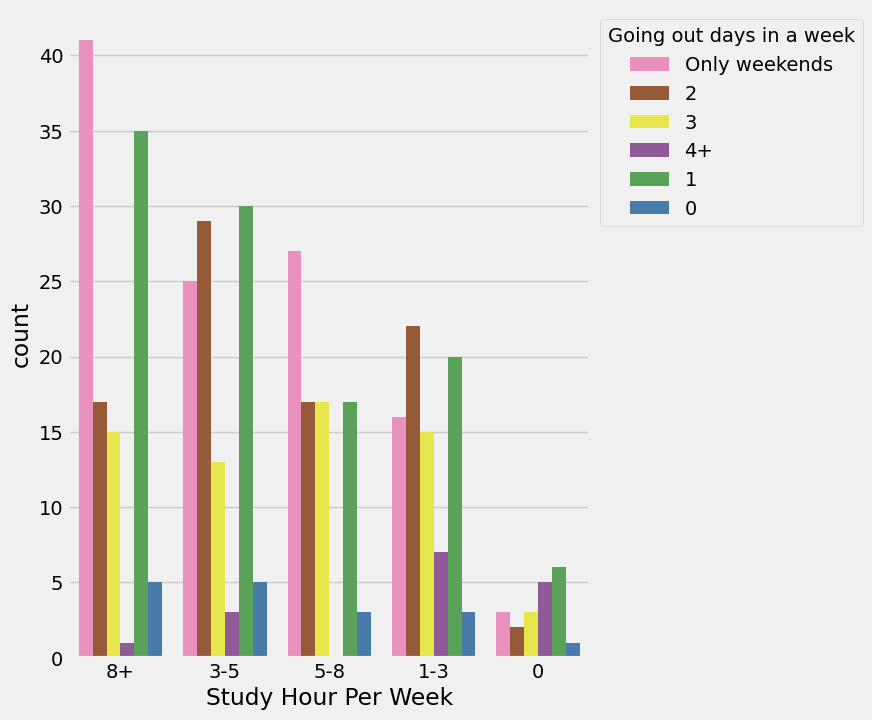

In [119]:
plt.figure(figsize=(6, 8), dpi=100)
sns.countplot(x='study_hours_week',  data=data, hue='socialising_week', palette='Set1_r')
plt.legend(title='Going out days in a week', loc='upper left',  bbox_to_anchor=(1, 1))
plt.xlabel('Study Hour Per Week')
plt.show()

Almost more than `60%` Students who go out to meet friends only on weekends and only once a week read more than the other students.

#### Lets see does learning more hours help student to pass thier exams.

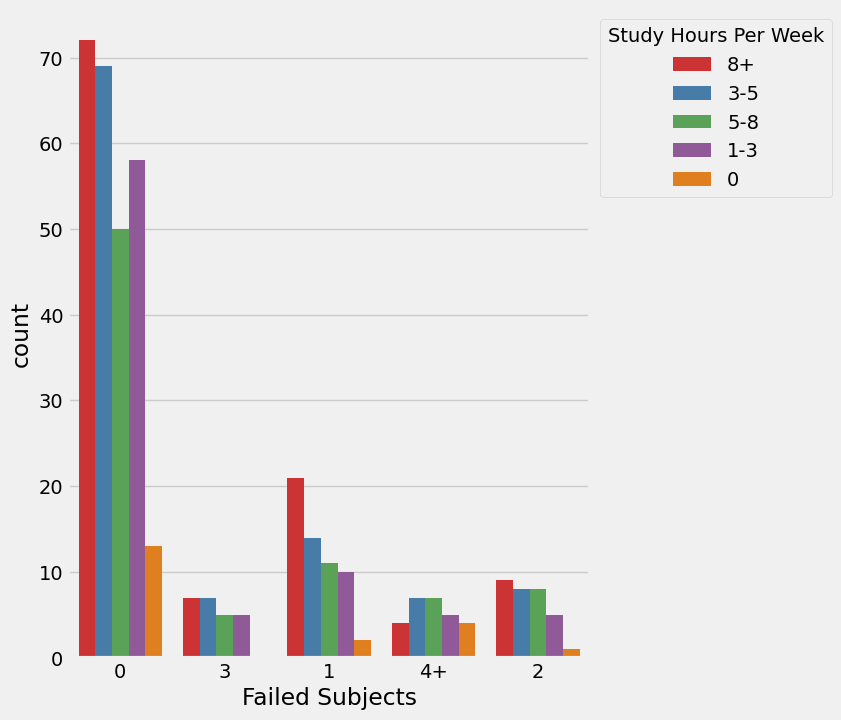

In [120]:
plt.figure(figsize=(6, 8), dpi=100)
sns.countplot(x='modules_failed',  data=data, hue='study_hours_week', palette='Set1')
plt.legend(title='Study Hours Per Week', loc='upper left',  bbox_to_anchor=(1, 1))
plt.xlabel('Failed Subjects')
plt.show()

There we see positive relation between student who learn more hours do good in exam than the students who do not learn.

<br>

#### Below plots explain that,
1. Most students read extra above 8 hours per week.
2. Most students monthly allowances is between 4001-5000, followed by range of 5001-6000. Male students are mainly engaged in doing jobs.
3. Male population is litter higher than the female population.
4. Classes missed due to hangover for both male and female is low.

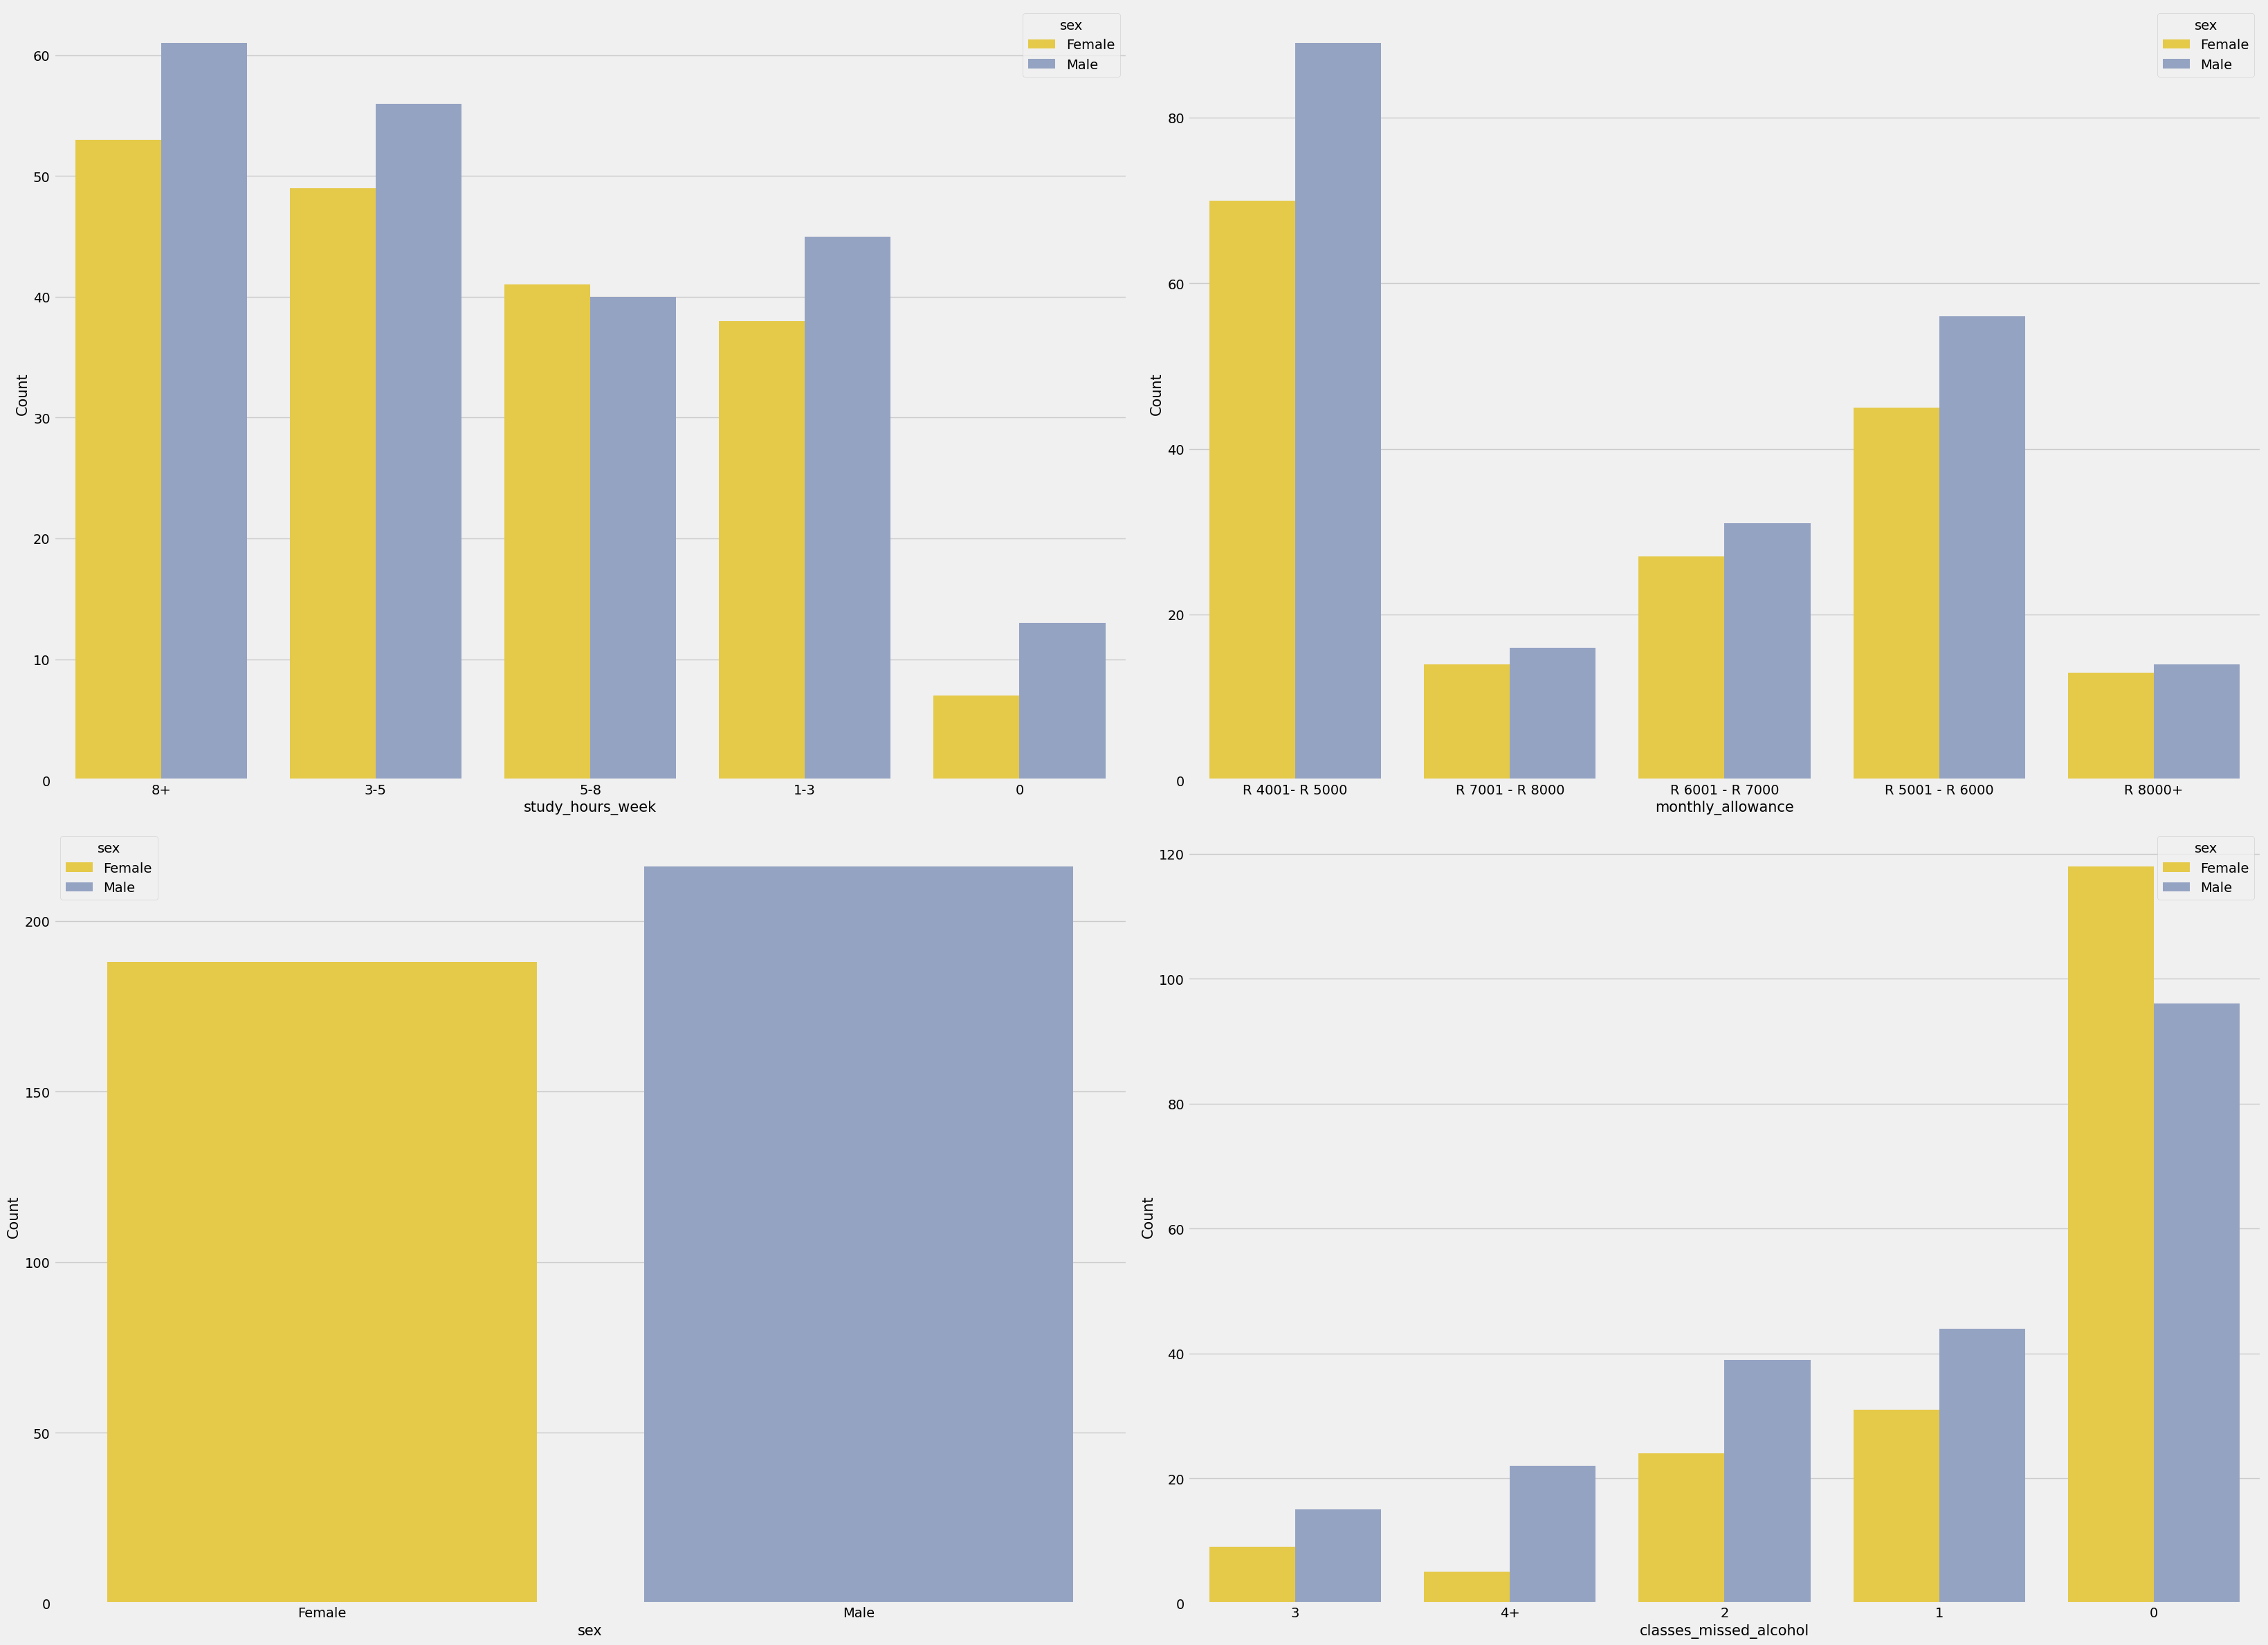

In [121]:
plt.style.use('fivethirtyeight')
fig=plt.figure()

cols=['study_hours_week','monthly_allowance','sex','classes_missed_alcohol']


for i,col in enumerate(cols):
    fig.add_subplot(2,2,i+1)
    fig.set_size_inches(33, 24)
    sns.countplot(x=col,data=data,hue='sex',
                  palette='Set2_r')
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.tight_layout()

<br>

#### Accomodation status of students.

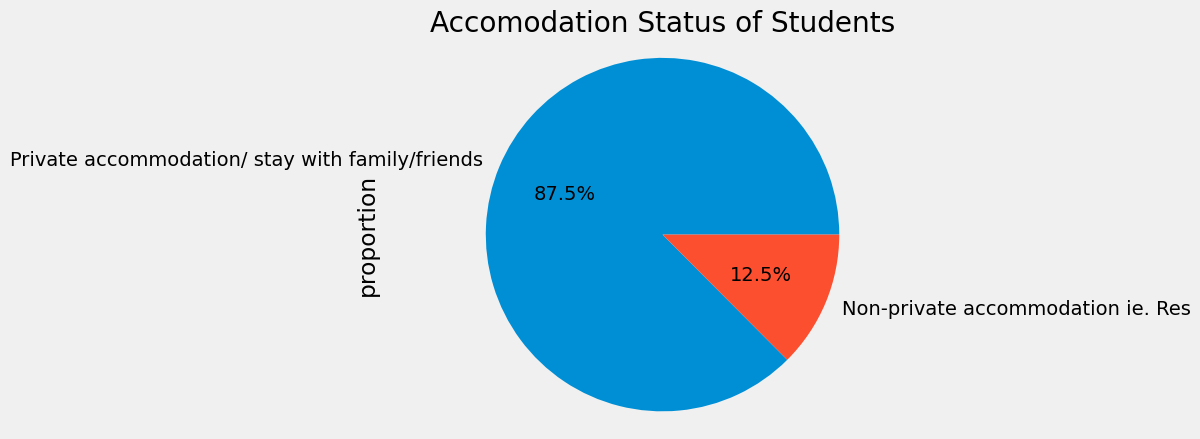

In [122]:
data.accommodation_status.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title("Accomodation Status of Students")
plt.axis('equal')
plt.show()

<br>

## Preprocessing

#### Outlier detection

<Axes: >

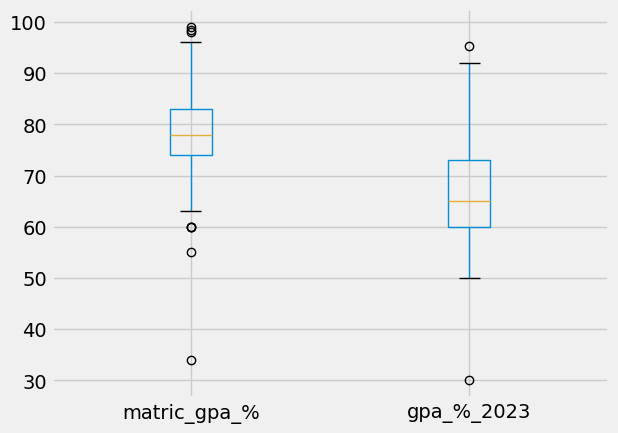

In [123]:
data.boxplot(column=['matric_gpa_%', 'gpa_%_2023'])

In [124]:
# Using IQR to remove outlier
conti_columns = ['matric_gpa_%', 'gpa_%_2023']

for each in conti_columns:
    Q1 = data[each].quantile(0.25)
    Q3 = data[each].quantile(0.75)
    IQR= Q3-Q1
    max_b = (1.5 * IQR) + Q3
    min_b = Q1 - (1.5 * IQR)

    to_drop_index = data[each][(data[each] > max_b) | (data[each]< min_b)].index
    data.drop(to_drop_index, axis=0, inplace=True)

    print(f"Dropped {to_drop_index} : {max_b} | {min_b} : for column {each}")

Dropped Index([38, 54, 73, 203, 254, 268, 335, 358], dtype='int64') : 96.5 | 60.5 : for column matric_gpa_%
Dropped Index([303], dtype='int64') : 92.5 | 40.5 : for column gpa_%_2023


<br>

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  397 non-null    object 
 1   sex                        395 non-null    object 
 2   matric_gpa_%               390 non-null    float64
 3   year_in_2023               325 non-null    object 
 4   faculty                    390 non-null    object 
 5   gpa_%_2023                 313 non-null    float64
 6   accommodation_status       374 non-null    object 
 7   monthly_allowance          366 non-null    object 
 8   scholarship_bursary_2023   389 non-null    object 
 9   study_hours_week           394 non-null    object 
 10  socialising_week           395 non-null    object 
 11  drinks_night               395 non-null    object 
 12  classes_missed_alcohol     394 non-null    object 
 13  modules_failed             394 non-null    object 
 14 

### **Checking duplicates in the datasets**

In [126]:
data.duplicated().sum()

0

<br>

### **Handling Null Values**

**Checking null values in each columns of dataframe**

In [127]:
data.isna().sum()

timestamp                     0
sex                           2
matric_gpa_%                  7
year_in_2023                 72
faculty                       7
gpa_%_2023                   84
accommodation_status         23
monthly_allowance            31
scholarship_bursary_2023      8
study_hours_week              3
socialising_week              2
drinks_night                  2
classes_missed_alcohol        3
modules_failed                3
in_relationship               3
parental_approval_alcohol     3
relationship_with_parents     3
dtype: int64

#### Handling rows with Excessive null values

In [128]:
excessive_null_rows = data[data.isna().sum(axis=1)>=7].index
excessive_null_rows

Index([224, 232], dtype='int64')

In [129]:
data.drop(excessive_null_rows, axis=0, inplace=True)

**Droped two labels 224 and 232 which have excessive numbers of null values.** 

<br>

#### Handling null value of column year_in_2023 by replacing Null values with `0th year`.

In [130]:
data['year_in_2023'].value_counts(dropna=False)

year_in_2023
2nd Year        149
1st Year        124
NaN              70
3rd Year         40
4th Year          7
Postgraduate      5
Name: count, dtype: int64

In [131]:
## Let's replace NAN value for column year_in_2023 to 0th year or high scholl degree
data['year_in_2023'] = data['year_in_2023'].fillna(value= '0th Year')

In [132]:
data['year_in_2023'].value_counts(dropna=False)

year_in_2023
2nd Year        149
1st Year        124
0th Year         70
3rd Year         40
4th Year          7
Postgraduate      5
Name: count, dtype: int64

In [133]:
data.isna().sum()

timestamp                     0
sex                           0
matric_gpa_%                  5
year_in_2023                  0
faculty                       5
gpa_%_2023                   82
accommodation_status         21
monthly_allowance            29
scholarship_bursary_2023      6
study_hours_week              1
socialising_week              0
drinks_night                  0
classes_missed_alcohol        1
modules_failed                1
in_relationship               1
parental_approval_alcohol     1
relationship_with_parents     1
dtype: int64

<br>

### Handling Categorical columns

In [134]:
## Handling Categorical columns which has null values less than 7 with its mode.
cat_cols = ['faculty', 'scholarship_bursary_2023', 'study_hours_week', 'classes_missed_alcohol',
           'modules_failed', 'in_relationship', 'parental_approval_alcohol', 'relationship_with_parents']

for each in cat_cols:
    mode_val = data[each].mode()[0]
    data[each] = data[each].fillna(mode_val)

In [135]:
## Handling Categorical columns which has null values more than 7 by replacing it with Uknown.
unknown_cols = ['accommodation_status', 'monthly_allowance']

for each in unknown_cols:
    data[each] = data[each].fillna(value='Unknown')

### Handling a continuous data column

In [136]:
data['matric_gpa_%'].fillna(data['matric_gpa_%'].mean(), inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10200\73364941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['matric_gpa_%'].fillna(data['matric_gpa_%'].mean(), inplace = True)


In [137]:
data.isna().sum()

timestamp                     0
sex                           0
matric_gpa_%                  0
year_in_2023                  0
faculty                       0
gpa_%_2023                   82
accommodation_status          0
monthly_allowance             0
scholarship_bursary_2023      0
study_hours_week              0
socialising_week              0
drinks_night                  0
classes_missed_alcohol        0
modules_failed                0
in_relationship               0
parental_approval_alcohol     0
relationship_with_parents     0
dtype: int64

<br>

In [138]:
# Drop null values of target
data.dropna(inplace = True)

In [139]:
#### Dropng timestamp which do not help us in giving future insights.
data = data.drop('timestamp', axis=1)

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 0 to 405
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        313 non-null    object 
 1   matric_gpa_%               313 non-null    float64
 2   year_in_2023               313 non-null    object 
 3   faculty                    313 non-null    object 
 4   gpa_%_2023                 313 non-null    float64
 5   accommodation_status       313 non-null    object 
 6   monthly_allowance          313 non-null    object 
 7   scholarship_bursary_2023   313 non-null    object 
 8   study_hours_week           313 non-null    object 
 9   socialising_week           313 non-null    object 
 10  drinks_night               313 non-null    object 
 11  classes_missed_alcohol     313 non-null    object 
 12  modules_failed             313 non-null    object 
 13  in_relationship            313 non-null    object 
 14 

### Handling the target column `gpa_%_2023`

#### TODO: Handle Null values of target column 'gpa_%_2023'
- Model Imputation

X = imput_dataset.drop('gpa_%_2023', axis=1)
y = imput_dataset['gpa_%_2023']

- Initialize and fit the IterativeImputer for the target variable y

imputer_y = IterativeImputer()
y_imputed = imputer_y.fit_transform(y.to_numpy().reshape(-1, 1)).flatten()

- Replace the original target variable with the imputed values

imput_dataset['gpa_%_2023'] = y_imputed

In [141]:
data['target'] = data['gpa_%_2023']
data.drop('gpa_%_2023', axis =1, inplace=True)

In [142]:
data.reset_index(drop=True, inplace=True)

### Chi2 test 

In [143]:
contingency_table = pd.crosstab(index=data['sex'],
                                columns=[data['modules_failed'], data['study_hours_week']]
)
contingency_table

modules_failed    0                  1                  ...  2   3             \
study_hours_week  0 1-3 3-5 5-8  8+  0 1-3 3-5 5-8  8+  ... 8+ 1-3 3-5 5-8 8+   
sex                                                     ...                     
Female            3  21  20  19  28  0   4   9   6  12  ...  3   1   3   2  0   
Male              8  20  20  16  29  2   5   5   5   8  ...  6   4   3   3  7   

modules_failed   4+                 
study_hours_week  0 1-3 3-5 5-8 8+  
sex                                 
Female            2   2   2   3  2  
Male              1   1   5   2  1  

[2 rows x 24 columns]

In [144]:
chi2_score, p_value, dof, expected = stats.chi2_contingency(contingency_table)


In [145]:
print(f"Chi Square test score = {chi2_score:.3f}")
print(f"p-value = {p_value:.3f}")
print("\nExcepted Frequency")
print(expected)

Chi Square test score = 22.130
p-value = 0.512

Excepted Frequency
[[ 5.20127796 19.38658147 18.91373802 16.54952077 26.95207668  0.9456869
   4.25559105  6.61980831  5.20127796  9.45686901  0.47284345  1.8913738
   3.7827476   3.30990415  4.25559105  2.36421725  2.8370607   2.36421725
   3.30990415  1.41853035  1.41853035  3.30990415  2.36421725  1.41853035]
 [ 5.79872204 21.61341853 21.08626198 18.45047923 30.04792332  1.0543131
   4.74440895  7.38019169  5.79872204 10.54313099  0.52715655  2.1086262
   4.2172524   3.69009585  4.74440895  2.63578275  3.1629393   2.63578275
   3.69009585  1.58146965  1.58146965  3.69009585  2.63578275  1.58146965]]


**Interpretating the result**
- The chi-square test score between observed and expected frequency is larger, it indicated a larger deviation from the expected frequencies.
- The p-value here is high than significance level 0.05. It suggets on accepting null hypothesis.

<br>

### Data Encoding, Normalization

In [146]:
# Data Encoding and Normalization
## One-Hot encoding
nominal_cols = ['sex', 'faculty', 'year_in_2023']

# one_hot_model = OneHotEncoder(sparse_output = False)
# encoded_onehot = one_hot_model.fit_transform(student_survey[nominal_cols])

encoded_onehot = pd.get_dummies(data[nominal_cols], dtype=int)
data.drop(nominal_cols, axis=1, inplace = True)


In [147]:
# Label Encoding
ordinal_cols = ['accommodation_status', 'monthly_allowance','scholarship_bursary_2023',
                'study_hours_week','socialising_week','drinks_night', 'classes_missed_alcohol','modules_failed',
                'in_relationship','parental_approval_alcohol','relationship_with_parents'] 

# label_encoder = LabelEncoder()
# encoded_label = label_encoder.fit_transform(student_survey[ordinal_cols])

for each in ordinal_cols:
    data[each], _ = pd.factorize(data[each])

In [148]:
final_dataset = pd.concat([data, encoded_onehot], axis=1)

In [149]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   matric_gpa_%                            313 non-null    float64
 1   accommodation_status                    313 non-null    int64  
 2   monthly_allowance                       313 non-null    int64  
 3   scholarship_bursary_2023                313 non-null    int64  
 4   study_hours_week                        313 non-null    int64  
 5   socialising_week                        313 non-null    int64  
 6   drinks_night                            313 non-null    int64  
 7   classes_missed_alcohol                  313 non-null    int64  
 8   modules_failed                          313 non-null    int64  
 9   in_relationship                         313 non-null    int64  
 10  parental_approval_alcohol               313 non-null    int64 

<br>

### Normalize

In [150]:
normalize = StandardScaler()
final_norm = normalize.fit_transform(final_dataset)

In [151]:
pd.DataFrame(final_norm, columns=final_dataset.columns)

,matric_gpa_%,accommodation_status,monthly_allowance,scholarship_bursary_2023,study_hours_week,socialising_week,drinks_night,classes_missed_alcohol,modules_failed,in_relationship,...,faculty_Engineering,faculty_Law,faculty_Medicine and Health Services,faculty_Science,year_in_2023_0th Year,year_in_2023_1st Year,year_in_2023_2nd Year,year_in_2023_3rd Year,year_in_2023_4th Year,year_in_2023_Postgraduate
0,-0.365008,-0.395407,-1.095457,-0.360505,-1.155375,-1.205451,-1.407833,-2.507187,-0.753244,-1.148268,...,-0.288175,-0.172062,-0.172062,-0.399073,-0.056614,-0.762108,1.076392,-0.38278,-0.151248,-0.127412
1,1.794677,-0.395407,-0.464006,2.773886,-1.155375,-1.205451,-0.571682,-1.676764,-0.753244,0.870877,...,-0.288175,-0.172062,-0.172062,-0.399073,-0.056614,-0.762108,1.076392,-0.38278,-0.151248,-0.127412
2,-0.365008,-0.395407,-1.095457,-0.360505,-0.362322,-0.498885,-1.407833,-2.507187,-0.753244,0.870877,...,-0.288175,-0.172062,-0.172062,-0.399073,-0.056614,1.312151,-0.929029,-0.38278,-0.151248,-0.127412
3,1.794677,-0.395407,0.167446,-0.360505,-0.362322,0.207681,-1.407833,-0.846341,-0.753244,-1.148268,...,3.470110,-0.172062,-0.172062,-0.399073,-0.056614,-0.762108,1.076392,-0.38278,-0.151248,-0.127412
4,-0.697268,-0.395407,-1.095457,-0.360505,-0.362322,-1.205451,0.264470,-0.015919,-0.077699,0.870877,...,-0.288175,-0.172062,-0.172062,-0.399073,-0.056614,-0.762108,1.076392,-0.38278,-0.151248,-0.127412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,-0.032749,-0.395407,-1.095457,-0.360505,0.430732,-1.205451,1.100621,0.814504,-0.753244,0.870877,...,-0.288175,-0.172062,5.811865,-0.399073,-0.056614,-0.762108,1.076392,-0.38278,-0.151248,-0.127412
309,1.296288,-0.395407,-1.095457,-0.360505,1.223785,-0.498885,-0.571682,-0.846341,-0.753244,-1.148268,...,-0.288175,-0.172062,-0.172062,-0.399073,-0.056614,1.312151,-0.929029,-0.38278,-0.151248,-0.127412
310,-0.697268,-0.395407,0.167446,-0.360505,1.223785,-1.205451,1.100621,0.814504,-0.077699,0.870877,...,-0.288175,-0.172062,-0.172062,-0.399073,-0.056614,-0.762108,1.076392,-0.38278,-0.151248,-0.127412
311,-0.863397,-0.395407,0.167446,2.773886,1.223785,0.914247,-1.407833,0.814504,-0.753244,-1.148268,...,-0.288175,-0.172062,-0.172062,-0.399073,-0.056614,-0.762108,1.076392,-0.38278,-0.151248,-0.127412


In [152]:
target

0      72.0
1      75.0
2      55.0
3      84.0
4      52.0
       ... 
396    74.0
397    70.0
398    60.0
402    58.0
405    63.0
Name: gpa_%_2023, Length: 313, dtype: float64

In [153]:
to_save = pd.DataFrame(final_norm, columns=final_dataset.columns)

In [154]:
to_save.shape

(313, 29)

In [155]:
to_save.to_csv(
    "clean_stat_data.csv",
    index=False
)